Notebook del modelo de árbol de decisión del dataframe de las peleas ponderadas

- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/31
- **Propósito del código:** Árbol de clasificación para el dataframe de peleas ponderadas (P2).
- **Autor(es):** Carlos Vallejo.  
- **Descripción y uso:** Ejecutar para ver el resultado del modelo de árbol de clasificación en P2.
- **Estado actual:** Primer modelo, falta mejorarlo.

In [19]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss, make_scorer, f1_score, roc_auc_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_parquet("C:\\Users\\Equipo\\Documents\\UCM\\PD1\\dataframes\\processed\\train.parquet")
train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,0.0,0.8,0.279,0.315,0.770,0.000,...,0.0,0.0,0.8,0.0,-0.8,-0.036,0.615385,1.0,0.0,526.0
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,0.0,0.5,0.696,0.550,0.084,0.000,...,0.0,0.5,0.0,0.0,-0.5,0.146,0.250000,0.4,0.0,3.3
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.3,0.0,0.552,0.741,0.874,1.000,...,0.0,0.0,0.0,0.0,0.3,-0.189,0.178571,-0.1,0.0,458.1
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.0,0.0,0.508,0.532,0.000,0.758,...,1.0,0.0,0.0,1.0,0.0,-0.024,-0.518519,-1.5,0.2,-455.0
4,2001-06-29,Pat Miletich,Shonie Carter,False,0.0,1.0,0.451,0.521,0.500,0.646,...,0.5,0.0,0.0,0.0,-1.0,-0.070,0.037945,0.8,-1.2,-137.3


In [6]:
val = pd.read_parquet("C:\\Users\\Equipo\\Documents\\UCM\\PD1\\dataframes\\processed\\validation.parquet")
val.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2021-06-26,Yancy Medeiros,Damir Hadzovic,True,0.0,0.0,0.261,0.323,0.000,0.432,...,1.0,0.5,1.5,1.8,0.0,-0.062,-0.368421,0.0,0.3,-59.5
1,2021-07-10,Tai Tuivasa,Greg Hardy,False,0.8,0.3,0.661,0.544,0.000,0.300,...,1.0,0.0,1.0,1.0,0.5,0.117,-0.230769,0.0,0.0,-20.0
2,2021-07-10,Irene Aldana,Yana Santos,False,0.3,0.0,0.367,0.731,0.000,0.150,...,0.0,0.0,3.5,0.0,0.3,-0.364,-0.187500,0.0,-0.2,-437.6
3,2021-07-10,Dustin Poirier,Conor McGregor,False,0.5,0.3,0.518,0.558,0.542,0.000,...,2.0,2.0,1.0,0.0,0.2,-0.040,0.222222,1.4,0.0,64.3
4,2021-07-10,Gilbert Burns,Stephen Thompson,False,0.2,0.3,0.547,0.467,0.075,0.000,...,0.0,0.0,2.0,3.0,-0.1,0.080,0.122449,0.3,0.0,140.9


In [7]:
test = pd.read_parquet("C:\\Users\\Equipo\\Documents\\UCM\\PD1\\dataframes\\processed\\test.parquet")
test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2023-04-22,Rani Yahya,Montel Jackson,True,0.0,2.1,0.569,0.513,0.415,0.240,...,0.0,0.0,5.0,2.0,-2.1,0.056,0.047222,0.5,0.7,140.0
1,2023-04-22,Jeremiah Wells,Matthew Semelsberger,False,0.7,1.8,0.529,0.382,0.060,0.800,...,0.0,0.0,0.0,1.8,-1.1,0.147,-0.403226,0.3,0.0,-111.5
2,2023-04-29,Caio Borralho,Michal Oleksiejczuk,False,0.0,0.6,0.565,0.510,0.690,0.100,...,0.0,2.0,0.0,1.0,-0.6,0.055,0.370656,1.0,1.2,414.4
3,2023-04-29,Song Yadong,Ricky Simon,False,0.5,0.8,0.379,0.595,0.500,0.407,...,0.0,0.0,1.0,1.0,-0.3,-0.216,0.150000,-0.7,0.0,-244.9
4,2023-04-29,Rodolfo Vieira,Cody Brundage,False,0.0,0.3,0.528,0.214,0.305,0.700,...,1.0,0.0,0.5,1.0,-0.3,0.314,-0.393102,0.1,0.0,62.6


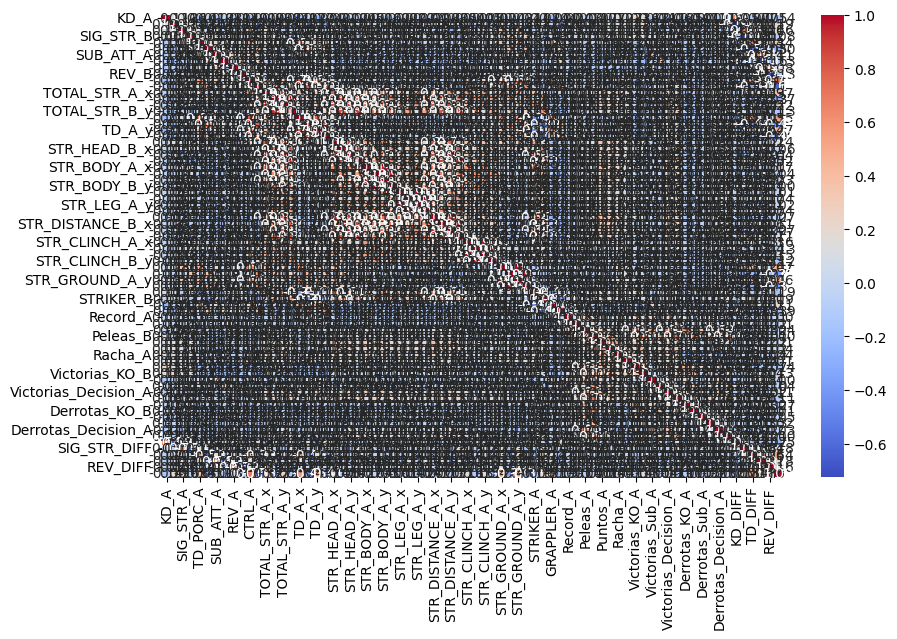

In [37]:
cor = train.drop(columns=['DATE','Peleador_A','Peleador_B','WINNER'])
plt.figure(figsize=(10, 6))
sns.heatmap(cor.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [8]:
def train_decision_tree_grid(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Definir modelo base
    dt = DecisionTreeClassifier(random_state=42)

    # Cuadrícula de hiperparámetros
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Función para medir la calidad de la división
        'max_depth': [5, 10, 15],  # Profundidad máxima del árbol
        'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
        'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
        'class_weight': [None, class_weight_dict]  # Ajuste de pesos por clase
    }

    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        scoring=f1_scorer,  # Optimiza F1-macro
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Entrenar el modelo
    grid_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = grid_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return grid_search.best_estimator_

In [42]:
X_train = train.drop(columns=["DATE","Peleador_A","Peleador_B", "WINNER"])
y_train = train['WINNER']
X_val = val.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_val = val['WINNER']
tree = train_decision_tree_grid(X_train, y_train, X_val, y_val)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.55      0.68      0.61       277
        True       0.50      0.37      0.42       244

    accuracy                           0.53       521
   macro avg       0.52      0.52      0.51       521
weighted avg       0.53      0.53      0.52       521



In [40]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree.predict(X_val)
y_val_prob = tree.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)
print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))


-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.510556621880998
F1-Score: 0.5124
AUC-ROC: 0.5190
Precisión: 0.4803
Sensibilidad: 0.5492
Log-loss: 11.067140320025425
[[132 145]
 [110 134]]


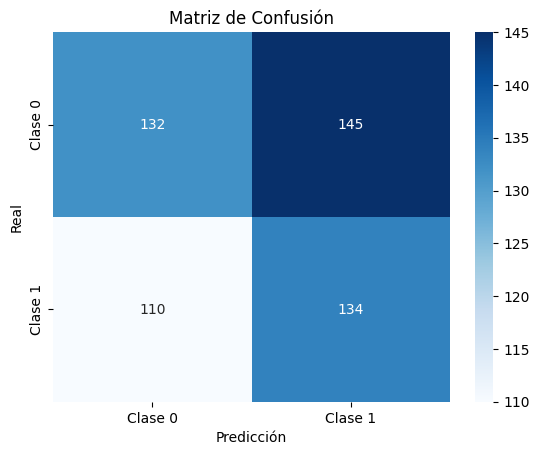

In [41]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [30]:
def train_decision_tree_random(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    scale_pos_weight = class_weights[1] / class_weights[0] if len(class_weights) > 1 else 1

    # Definir modelo base
    dt2 = DecisionTreeClassifier(random_state=42)

    # Distribución de hiperparámetros para búsqueda aleatoria
    param_dist = {
        "criterion": ["gini", "entropy"],  # Función de evaluación del árbol
        "max_depth": np.arange(3, 30, 3),  # Profundidad máxima del árbol
        "min_samples_split": np.arange(2, 20, 2),  # Mínimo de muestras para dividir un nodo
        "min_samples_leaf": np.arange(1, 20, 2),  # Mínimo de muestras en una hoja
        "max_features": ["auto", "sqrt", "log2", None],  # Número máximo de características a considerar
        "splitter": ["best", "random"],  # Método de división de nodos
    }
    #  ['ccp_alpha', 'class_weight', 'max_leaf_nodes', 'min_impurity_decrease',
    #  'min_weight_fraction_leaf', 'monotonic_cst', 'random_state']  otros posibles parámetros

    # Definir la métrica de optimización como el F1-score macro
    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    random_search = RandomizedSearchCV(
        estimator=dt2,
        param_distributions=param_dist,
        scoring=f1_scorer,
        n_iter=50,
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )


    # Entrenar el modelo
    random_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", random_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = random_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return random_search.best_estimator_

In [31]:
print("-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --")
tree2 = train_decision_tree_random(X_train,y_train,X_val,y_val)

-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'splitter': 'random', 'min_samples_split': np.int64(12), 'min_samples_leaf': np.int64(5), 'max_features': None, 'max_depth': np.int64(12), 'criterion': 'gini'}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.50      0.55      0.53       277
        True       0.43      0.39      0.41       244

    accuracy                           0.47       521
   macro avg       0.47      0.47      0.47       521
weighted avg       0.47      0.47      0.47       521



c:\Users\Equipo\Documents\GitHub\c2425-R4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Equipo\Documents\GitHub\c2425-R4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\Documents\GitHub\c2425-R4\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Equipo\Documents

In [ ]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree2.predict(X_val)
y_val_prob = tree2.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)

print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))



-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.4740882917466411
F1-Score: 0.4069
AUC-ROC: 0.4921
Precisión: 0.4312
Sensibilidad: 0.3852
Log-loss: 4.909300791590814
[[153 124]
 [150  94]]


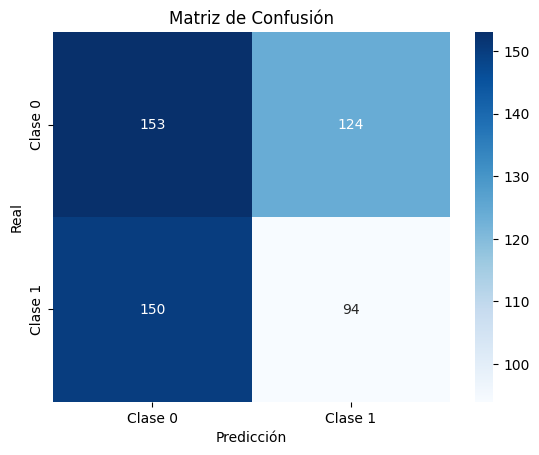

In [33]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

En este caso vemos que el modelo de Random Search es mejor que el de Grid Search.